# Feature Engineering. Практическая работа

Сдаётся на проверку.

## Цели практической работы

Научиться: 

*   генерировать новые признаки; 
*   нормализовать и кодировать данные с помощью lambda-функций и библиотеки scikit-learn.


## Что входит в практическую работу

1. Построить признаки из строк.
2. Преобразовать категориальные переменные.
3. Стандартизировать данные.
4. Использовать MinMaxScaler для нормализации данных.
5. Создать признаки на основе дат.
6. Сохранить датафрейм для этапа моделирования.

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, соблюдены отступы и правила расстановки пробелов.
- При построении графиков название и оси подписаны, выведена легенда, если требуется. 
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них тем.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему куратору.


## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите генерировать дополнительные признаки и завершите подготовку датасета для этапа моделирования.

## Описание датасета:
- `id`— идентификатор записи;
- `url`— URL-записи о продаже;
- `region`— регион;
- `region_url`— URL региона;
- `price`— стоимость;
- `year`— год выпуска;
- `manufacturer`— производитель;
- `model`— модель;
- `condition`— состояние;
- `cylinders`— количество цилиндров;
- `fuel`— тип топлива;
- `odometer`— количество пройденных миль;
- `title_status`— статус;
- `transmission`— коробка передач;
- `VIN`— идентификационный номер;
- `drive`— тип привода;
- `size`— размер;
- `type`— кузов;
- `paint_color`— цвет;
- `image_url`— URL изображения;
- `description`— указанное описание;
- `county`— страна;
- `state`— штат;
- `lat`— широта;
- `long`— долгота;
- `posting_date`— дата размещения объявления о продаже;
- `price_category`— категория цены.


In [1]:
# Импортируйте необходимые библиотеки
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
import seaborn as sns

### Задача 1. Построение признаков из строк

1. Загрузите датасет из `data/vehicles_dataset_upd6.csv`, выведите первые пять записей и список колонок.

In [2]:
# Ваш код здесь
df = pd.read_csv("data/vehicles_dataset_upd6.csv")
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,is_jeep,is_honda,is_nissan,x0_diesel,x0_electric,x0_gas,x0_hybrid,x0_other,std_scaled_odometer,std_scaled_price
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0,0,0,1.0,0.0,0.0,0.0,0.0,-1.079390,2.958509
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0,0,0,0.0,0.0,0.0,0.0,1.0,-0.560115,-0.085826
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0,0,0,0.0,0.0,1.0,0.0,0.0,-1.292863,1.406256
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.352621,-0.281218
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0,0,0,0.0,0.0,0.0,0.0,1.0,-0.234311,-0.274017


2. Выведите список значений и количество уникальных значений для модели автомобиля.

In [3]:
# Ваш код здесь
df.model.value_counts()


f-150                        145
other                        107
silverado 1500               105
1500                          99
camry                         76
                            ... 
sierra1500 crewcab 4x4         1
corolla se                     1
xc60 t6 inscription sport      1
silverado 1500 ls              1
a3 2.0t premium plus pzev      1
Name: model, Length: 3341, dtype: int64

3. Количество уникальных значений велико. Попробуем их сократить, оставив только первое слово в наименовании модели. С помощью lambda-функции и преобразования над строками создайте новый признак `short_model`, содержащий только первое слово из наименования модели, выведите его и количество получившихся уникальных значений.

In [4]:
# Ваш код здесь

df["short_model"] = df.model.apply(lambda x: x.split(" ")[0])
len(df.short_model.unique())

943

### Задача 2. Преобразование категориальных переменных

1. Для категориальных переменных `short_model`, `transmission`, `region`, `manufacturer`, `state`, `title_status`, `age_category` распечатайте наименование категории и количество уникальных значений в ней.


In [5]:
# Ваш код здесь
categories = ["short_model","transmission","region","manufacturer","state","title_status","age_category"]
for i in categories:
    print("Количество уникальных значений в категории",i,"=",len(df[i].unique()))

Количество уникальных значений в категории short_model = 943
Количество уникальных значений в категории transmission = 3
Количество уникальных значений в категории region = 393
Количество уникальных значений в категории manufacturer = 40
Количество уникальных значений в категории state = 51
Количество уникальных значений в категории title_status = 6
Количество уникальных значений в категории age_category = 3


2. Создайте датафрейм `data`, содержащий только выбранные категориальные переменные.

In [6]:
# Ваш код здесь
data = df[categories]
data.head()

,short_model,transmission,region,manufacturer,state,title_status,age_category
0,2500,other,chattanooga,ram,tn,clean,new
1,explorer,automatic,north jersey,ford,nj,clean,new
2,golf,other,reno / tahoe,volkswagen,ca,clean,new
3,rav4,automatic,fayetteville,toyota,nc,clean,average
4,1,other,knoxville,bmw,tn,clean,average


3. Создайте объект класса OneHotEncoder, который будет отвечать за преобразование. Уточните, что на выходе должна быть неразреженная матрица.

In [7]:
# Ваш код здесь
ohe = OneHotEncoder(sparse=False)

4. Идентифицируйте параметры преобразования на датафрейме с категориальными переменными.

In [8]:
# Ваш код здесь
ohe.fit(data)

OneHotEncoder(sparse=False)

5. Примените преобразование для датафрейма с категориальными переменными и сохраните в новую переменную, распечатайте получившуюся матрицу и её размерность.

In [9]:
# Ваш код здесь
transformed_data = ohe.transform(data)
transformed_data.shape

(9619, 1439)

6. Выведите новые наименования признаков с помощью метода `get_feature_names_out`.

In [10]:
# Ваш код здесь
feature_names = ohe.get_feature_names_out()
feature_names

array(['short_model_-benz', 'short_model_1', 'short_model_124', ...,
       'age_category_average', 'age_category_new', 'age_category_old'],
      dtype=object)

7. Добавьте в исходный датафрейм получившиеся новые признаки, выведите первые пять записей датафрейма и список колонок.

In [11]:
# Ваш код здесь
transformed_df = pd.DataFrame(transformed_data, columns=feature_names)
df = pd.concat([df, transformed_df], axis=1)




In [12]:
print(df.columns.tolist())
df.head()

['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'image_url', 'description', 'state', 'lat', 'long', 'posting_date', 'price_category', 'date', 'odometer_km', 'odometer/price', 'region_new', 'region_corrected', 'manufacturer_model', 'desc_len', 'model_in_desc', 'price_k$', 'age_category', 'model_len', 'model_word_count', 'is_audi', 'is_ford', 'is_chevrolet', 'is_toyota', 'is_jeep', 'is_honda', 'is_nissan', 'x0_diesel', 'x0_electric', 'x0_gas', 'x0_hybrid', 'x0_other', 'std_scaled_odometer', 'std_scaled_price', 'short_model', 'short_model_-benz', 'short_model_1', 'short_model_124', 'short_model_128i', 'short_model_135i', 'short_model_1500', 'short_model_163869', 'short_model_1928', 'short_model_1951', 'short_model_1954', 'short_model_1960s', 'short_model_1966', 'short_model_1968', 'short_model_1972', 'short_model_1977', 'short_model_1978', 'short_model_198.5', 'short_model_1988', 'short_model_1994', 'short

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,state_wy,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,age_category_average,age_category_new,age_category_old
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


8. Посмотрите на результат обратного преобразования получившейся матрицы в исходные признаки, используйте `inverse_transform`.

In [13]:
# ДЛя более удобного восприятия сделал через датафрейм,a так без него вернет array
df_inverse_tranform = pd.DataFrame(ohe.inverse_transform(transformed_data))
df_inverse_tranform

,0,1,2,3,4,5,6
0,2500,other,chattanooga,ram,tn,clean,new
1,explorer,automatic,north jersey,ford,nj,clean,new
2,golf,other,reno / tahoe,volkswagen,ca,clean,new
3,rav4,automatic,fayetteville,toyota,nc,clean,average
4,1,other,knoxville,bmw,tn,clean,average
...,...,...,...,...,...,...,...
9614,rav4,automatic,chautauqua,toyota,ny,clean,old
9615,wrangler,other,binghamton,jeep,ny,clean,average
9616,a3,automatic,salem,audi,or,clean,average
9617,cayenne,automatic,madison,porsche,wi,clean,new


### Задача 3. Стандартизация данных

1. Создайте переменную под количественные переменные `lat`, `long`, `year`, `odometer/price`, `desc_len`, `model_in_desc`, `model_len`, `model_word_count` и создайте датафрейм `data`, содержащий только выбранные количественные переменные.


In [14]:
# Ваш код здесь
quantitative_variables  = ["`lat`, `long`, `year`, `odometer/price`, `desc_len`, `model_in_desc`,\
`model_len`, `model_word_count`"]
arr = []

for var in quantitative_variables:
    var_list = var.split(',')
    for elem in var_list:
        formatted_elem = elem.replace('`',"").strip()
        arr.append(formatted_elem)
        
quantitative_variables = arr
quantitative_variables

['lat',
 'long',
 'year',
 'odometer/price',
 'desc_len',
 'model_in_desc',
 'model_len',
 'model_word_count']

2. Создайте объект `std_scaler` класса StandardScaler с параметрами по умолчанию, который будет отвечать за стандартизацию.

In [15]:
# Ваш код здесь
std_scaler = StandardScaler()

3. Идентифицируйте параметры преобразования на датафрейме с количественными переменными.

In [16]:
# Ваш код здесь
std_scaler.fit(df[quantitative_variables])

StandardScaler()

4. Примените преобразование для датафрейма с количественными переменными и сохраните в новую переменную, распечатайте получившуюся матрицу и её размерность.

In [17]:
std_scaled = std_scaler.transform(df[quantitative_variables])
std_scaler.var_

array([3.27263136e+01, 3.18851860e+02, 4.07743752e+01, 7.96705726e+02,
       7.55022892e+06, 5.62793839e+00, 7.49967998e+01, 2.19563530e+00])

5. Создайте наименования новых признаков по шаблону: `lat_std` для `lat` и так далее.

In [18]:
# Ваш код здесь
std_quantitative_variables = [ s + '_std' for s in quantitative_variables]


    

6. Добавьте в исходный датафрейм получившиеся новые признаки, выведите первые пять записей датафрейма и список колонок.

In [19]:
# Ваш код здесь
df[std_quantitative_variables] = std_scaled
df.head()


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,age_category_new,age_category_old,lat_std,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,1.0,0.0,-0.619172,0.484245,1.322394,-0.510784,0.632075,-0.155788,1.163032,1.910669
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,1.0,0.0,0.388014,1.110800,0.695973,-0.402947,-0.646781,-0.155788,0.932087,1.235799
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,1.0,0.0,-0.843059,0.531185,0.852578,-0.514480,0.560744,-0.155788,0.470197,0.560930
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,0.0,-0.504509,0.853562,0.226157,-0.241883,0.180435,-0.155788,-0.915473,-0.788810
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0.0,0.0,-0.460101,0.557607,0.069552,-0.333074,0.766366,-0.155788,1.163032,1.910669


### Задача 4. MinMax-нормализация данных

1. Импортируйте MinMaxScaler из `sklearn.preprocessing`.

In [20]:
#сделано в начале


2. Создайте датафрейм, содержащий переменные `lat` и `long`.

In [21]:
# Ваш код здесь
df_minmax = df[['lat','long']]


3. Повторите действия пунктов 2–6 из задачи 3 для добавления в исходный датафрейм признаков `lat_mm` и `long_mm`. Выведите получившийся датафрейм.

In [22]:
# Ваш код здесь
mm_scaler = MinMaxScaler()
mm_scaler.fit(df_minmax)
mm_scaled = mm_scaler.transform(df_minmax)

df[["lat_mm","long_mm"]] = mm_scaled
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,lat_std,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,lat_mm,long_mm
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,-0.619172,0.484245,1.322394,-0.510784,0.632075,-0.155788,1.163032,1.910669,0.341769,0.288699
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.388014,1.110800,0.695973,-0.402947,-0.646781,-0.155788,0.932087,1.235799,0.468665,0.333055
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,-0.843059,0.531185,0.852578,-0.514480,0.560744,-0.155788,0.470197,0.560930,0.313561,0.292022
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,-0.504509,0.853562,0.226157,-0.241883,0.180435,-0.155788,-0.915473,-0.788810,0.356215,0.314844
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,-0.460101,0.557607,0.069552,-0.333074,0.766366,-0.155788,1.163032,1.910669,0.361810,0.293893


In [23]:
std_scaler = StandardScaler()
std_scaler.fit(df_minmax)
mm_std_scaled = std_scaler.transform(df_minmax)

df[["lat_std","long_std"]] = mm_std_scaled
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,lat_std,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,lat_mm,long_mm
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,-0.619172,0.484245,1.322394,-0.510784,0.632075,-0.155788,1.163032,1.910669,0.341769,0.288699
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.388014,1.110800,0.695973,-0.402947,-0.646781,-0.155788,0.932087,1.235799,0.468665,0.333055
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,-0.843059,0.531185,0.852578,-0.514480,0.560744,-0.155788,0.470197,0.560930,0.313561,0.292022
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,-0.504509,0.853562,0.226157,-0.241883,0.180435,-0.155788,-0.915473,-0.788810,0.356215,0.314844
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,-0.460101,0.557607,0.069552,-0.333074,0.766366,-0.155788,1.163032,1.910669,0.361810,0.293893


4. Создайте переменную под географические признаки `lat`, `lat_std`, `lat_mm`, `long`, `long_std`, `long_mm` и выведите их. Посмотрите на различия в значениях для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования. 

In [24]:
# Ваш код здесь
df_normalize = df[["lat", "lat_std", "lat_mm", "long", "long_std", "long_mm"]]
df_normalize

,lat,lat_std,lat_mm,long,long_std,long_mm
0,35.060000,-0.619172,0.341769,-85.250000,0.484245,0.288699
1,40.821805,0.388014,0.468665,-74.061962,1.110800,0.333055
2,33.779214,-0.843059,0.313561,-84.411811,0.531185,0.292022
3,35.715954,-0.504509,0.356215,-78.655304,0.853562,0.314844
4,35.970000,-0.460101,0.361810,-83.940000,0.557607,0.293893
...,...,...,...,...,...,...
9614,42.123900,0.615626,0.497341,-79.189500,0.823646,0.312727
9615,43.216990,0.806702,0.521415,-77.755610,0.903947,0.318411
9616,44.925908,1.105428,0.559052,-122.982753,-1.628875,0.139104
9617,43.029559,0.773939,0.517287,-89.397796,0.251959,0.272255


5. Выведите описательные статистики для всех географических признаков. Посмотрите на различия в статистиках для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования.

In [25]:
# Ваш код здесь
print(df_normalize.lat.describe())
print(df_normalize.lat_std.describe())
print(df_normalize.lat_mm.describe())

count    9619.000000
mean       38.602095
std         5.720989
min        19.541726
25%        34.920000
50%        39.300000
75%        42.382100
max        64.947500
Name: lat, dtype: float64
count    9.619000e+03
mean     2.108662e-16
std      1.000052e+00
min     -3.331829e+00
25%     -6.436450e-01
50%      1.219966e-01
75%      6.607601e-01
max      4.605283e+00
Name: lat_std, dtype: float64
count    9619.000000
mean        0.419779
std         0.125997
min         0.000000
25%         0.338685
50%         0.435149
75%         0.503028
max         1.000000
Name: lat_mm, dtype: float64


6. Выведите матрицу корреляций для всех географических признаков, чтобы убедиться, что нормализация признаков сохранила свойства исходных признаков.

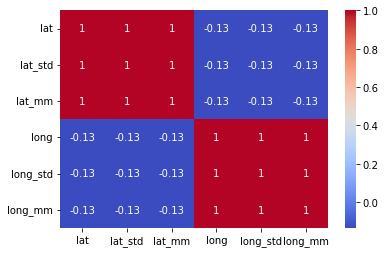

In [26]:
# вот так нельзя делать никогда) когда много данных
# sns.heatmap(df_normalize, annot=True, cmap='coolwarm')
# plt.show()
corr_matrix = df_normalize.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Задача 5. Признаки на основе дат

1. Выведите по отдельности колонки `posting_date` и `date`. 

In [27]:
# Ваш код здесь
print(df.posting_date.head(10))
print(df.date.head(10))


0    2021-04-17T12:30:50-0400
1    2021-05-03T15:40:21-0400
2    2021-04-28T03:52:20-0700
3    2021-04-17T10:08:57-0400
4    2021-04-08T15:10:56-0400
5    2021-05-04T11:59:42-0500
6    2021-04-23T19:34:13-0400
7    2021-04-30T17:20:30-0400
8    2021-04-27T21:14:22-0500
9    2021-04-30T15:20:33-0400
Name: posting_date, dtype: object
0    2021-04-17 16:30:50+00:00
1    2021-05-03 19:40:21+00:00
2    2021-04-28 10:52:20+00:00
3    2021-04-17 14:08:57+00:00
4    2021-04-08 19:10:56+00:00
5    2021-05-04 16:59:42+00:00
6    2021-04-23 23:34:13+00:00
7    2021-04-30 21:20:30+00:00
8    2021-04-28 02:14:22+00:00
9    2021-04-30 19:20:33+00:00
Name: date, dtype: object


2. Ранее преобразованная колонка `date` после сохранения в файл и загрузки из него содержит данные в строковом формате, поэтому измените её тип c помощью `pd.to_datetime`.

In [28]:
# Ваш код здесь
df["date"] = pd.to_datetime(df.date )
df.date

0      2021-04-17 16:30:50+00:00
1      2021-05-03 19:40:21+00:00
2      2021-04-28 10:52:20+00:00
3      2021-04-17 14:08:57+00:00
4      2021-04-08 19:10:56+00:00
                  ...           
9614   2021-04-10 20:33:57+00:00
9615   2021-05-03 13:36:30+00:00
9616   2021-04-22 19:14:01+00:00
9617   2021-04-14 14:14:42+00:00
9618   2021-04-24 17:50:49+00:00
Name: date, Length: 9619, dtype: datetime64[ns, UTC]

3. Несколькими способами извлеките номер месяца продажи автомобиля.

3.1. Из переменной `posting_date` с помощью lambda-функции и операций над строками.

In [29]:
# Ваш код здесь
df.posting_date.apply(lambda x: x.split("T")[0].split("-")[1])

0       04
1       05
2       04
3       04
4       04
        ..
9614    04
9615    05
9616    04
9617    04
9618    04
Name: posting_date, Length: 9619, dtype: object

3.2. Из переменной `date` с помощью lambda-функции и метода `month`.

In [30]:
%%time
df.date.apply(lambda x: x.month)

CPU times: user 2.28 ms, sys: 0 ns, total: 2.28 ms
Wall time: 1.56 ms


0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: date, Length: 9619, dtype: int64

3.3. Из переменной `date` с помощью `dt` и метода `month`.

In [31]:
%%time
df.date.dt.month

CPU times: user 2.67 ms, sys: 524 µs, total: 3.19 ms
Wall time: 2.06 ms


0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: date, Length: 9619, dtype: int64

4. Создайте любым из способов (3.2 или 3.3) признак `month`, обозначающий номер месяца размещения объявления о продаже автомобиля, и распечатайте его.

In [32]:
# Ваш код здесь
df["month"] = df.posting_date.apply(lambda x: x.split("T")[0].split("-")[1])
df.month

0       04
1       05
2       04
3       04
4       04
        ..
9614    04
9615    05
9616    04
9617    04
9618    04
Name: month, Length: 9619, dtype: object

5. Создайте признак `dayofweek`, обозначающий день недели размещения объявления о продаже автомобиля, и распечатайте его.

In [33]:
# Ваш код здесь
df["dayofweek"] = df.posting_date.apply(lambda x: x.split("T")[0].split("-")[2])
df.dayofweek

0       17
1       03
2       28
3       17
4       08
        ..
9614    10
9615    03
9616    22
9617    14
9618    24
Name: dayofweek, Length: 9619, dtype: object

6. Создайте признак `diff_years`, обозначающий количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля, и распечатайте его. Дополнительные корректировки не применяйте.

In [34]:
# Ваш код здесь
df["diff_years"] = df.apply(lambda x: int(x.posting_date.split("T")[0].split("-")[0])-x.year, axis=1)
df.diff_years

0        1
1        5
2        4
3        8
4        9
        ..
9614    19
9615    13
9616    10
9617     6
9618     4
Name: diff_years, Length: 9619, dtype: int64

7. Примените стандартизацию к новым признаками и сохраните результат в новые признаки вида `month_std`.

In [35]:
# Ваш код здесь
#std_scaler = StandardScaler()
std_scaler.fit(df[["month","dayofweek","diff_years"]])
date_scaled = std_scaler.transform(df[["month","dayofweek","diff_years"]])

df[["month_std","dayofweek_std","diff_years_std"]] = date_scaled
df.iloc[:5,-3:]


,month_std,dayofweek_std,diff_years_std
0,-0.599647,0.151465,-1.322394
1,1.667649,-1.229334,-0.695973
2,-0.599647,1.236378,-0.852578
3,-0.599647,0.151465,-0.226157
4,-0.599647,-0.736191,-0.069552


### Задача 6. Сохранение датафрейма для этапа моделирования

1. Удалите колонки, которые были исходными для формирования признаков, а также новые признаки, которые были добавлены с целью обучения.  Сохраните новый датафрейм в переменную `df_prepared`.

In [39]:
# Допишите код

columns_for_drop = ['year', 'url', 'region', 'region_url', 'manufacturer',
                    'model', 'fuel', 'odometer', 'title_status', 'transmission',
                    'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
                    'odometer_km', 'odometer/price', 'region_new', 'region_corrected', 'manufacturer_model',
                    'desc_len', 'model_in_desc', 'price_k$', 'age_category', 'model_len', 'model_word_count',
                    'short_model', 'lat_mm', 'long_mm', 'date', 'std_scaled_price',
                    'month', 'dayofweek', 'diff_years',
                    'odometer/price_std']
df = df.drop(columns=columns_for_drop)

2. Распечатайте оставшийся список колонок и размерность финального датафрейма.

In [46]:
# Ваш код здесь
df.columns.tolist()


['id',
 'price',
 'price_category',
 'is_audi',
 'is_ford',
 'is_chevrolet',
 'is_toyota',
 'is_jeep',
 'is_honda',
 'is_nissan',
 'x0_diesel',
 'x0_electric',
 'x0_gas',
 'x0_hybrid',
 'x0_other',
 'std_scaled_odometer',
 'short_model_-benz',
 'short_model_1',
 'short_model_124',
 'short_model_128i',
 'short_model_135i',
 'short_model_1500',
 'short_model_163869',
 'short_model_1928',
 'short_model_1951',
 'short_model_1954',
 'short_model_1960s',
 'short_model_1966',
 'short_model_1968',
 'short_model_1972',
 'short_model_1977',
 'short_model_1978',
 'short_model_198.5',
 'short_model_1988',
 'short_model_1994',
 'short_model_1999',
 'short_model_2',
 'short_model_200',
 'short_model_2000',
 'short_model_2002',
 'short_model_2006',
 'short_model_2007',
 'short_model_2008',
 'short_model_2009',
 'short_model_2012',
 'short_model_2015',
 'short_model_2016',
 'short_model_2017',
 'short_model_2018',
 'short_model_210',
 'short_model_240',
 'short_model_2500',
 'short_model_2500hd',
 'sh

In [43]:
df.shape

(9619, 1465)

3. Запишите преобразованный датафрейм в файл `data/vehicles_dataset_prepared.csv`, индекс не сохраняйте.

In [48]:
# Ваш код здесь
df.to_csv("data/vehicles_dataset_prepared.csv",index = False)

## Описание преобразованного датасета:
- `id`— идентификатор записи;
- `is_manufacturer_name`— признак производителя автомобиля;

- `region_*`— регион;
- `x0_*`— тип топлива;
- `manufacturer_*`— производитель;
- `short_model_*`— сокращённая модель автомобиля;
- `title_status_*`— статус;
- `transmission_*`— коробка передач;
- `state_*`— штат;
- `age_category_*`— возрастная категория автомобиля;

- `std_scaled_odometer`— количество пройденных миль (после стандартизации);
- `year_std`— год выпуска (после стандартизации);
- `lat_std`— широта (после стандартизации);
- `long_std`— долгота (после стандартизации);
- `odometer/price_std`— отношение стоимости к пробегу автомобиля (после стандартизации);
- `desc_len_std`— количество символов в тексте объявления о продаже (после стандартизации);
- `model_in_desc_std`— количество наименований модели автомобиля в тексте объявления о продаже (после стандартизации);
- `model_len_std`— длина наименования автомобиля (после стандартизации);
- `model_word_count_std`— количество слов в наименовании автомобиля (после стандартизации);
- `month_std`— номер месяца размещения объявления о продаже автомобиля (после стандартизации);
- `dayofweek_std`— день недели размещения объявления о продаже автомобиля (после стандартизации);
- `diff_years_std`— количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля (после стандартизации);

- `price`— стоимость;
- `price_category`– категория цены.